# A Comparative Study on the Efficiency and Applicability of Python and R for Data Science Tasks
### Author: Tabassum Unnisa, Independent Researcher, Data Science, ML and AI
**Generated on:** 2025-11-04

## 1. Introduction
This notebook presents an experimental comparison of Python and R for three common data science tasks — Logistic Regression and Data Visualization — using benchmark datasets: Iris, Titanic, and COVID-19.

**Objectives:**
- Compare runtime and accuracy for Logistic Regression in Python and R.
- Analyze data visualization performance on COVID-19 data.
- Record and report all experimental results for research publication.

## 2. Iris Dataset Experiment
### Task: Logistic Regression
**Metrics:** Runtime ⏱️, Accuracy 🎯

Dataset Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Fetch Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

# Split data
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with runtime measurement
start_time = time.time()
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
runtime_iris = time.time() - start_time
accuracy_iris = accuracy_score(y_test, y_pred)

print(f"Iris Logistic Regression - Runtime: {runtime_iris:.4f} sec | Accuracy: {accuracy_iris:.4f}")


Iris Logistic Regression - Runtime: 0.0253 sec | Accuracy: 1.0000


## 3. Titanic Dataset Experiment
### Task: Data Cleaning + Logistic Regression
**Metrics:** Runtime ⏱️, Accuracy 🎯

Dataset Source: [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic)


## 4. COVID-19 Dataset Experiment
### Task: Data Visualization (Trend Plot)
**Metric:** Plot Time ⏱️

Dataset Source: [WHO COVID-19 Global Data](https://covid19.who.int/WHO-COVID-19-global-data.csv)


✅ Titanic dataset loaded successfully.
Training data shape: (891, 12)

✅ Data cleaning and encoding completed.
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2

✅ Train-test split completed.
Training samples: 712
Testing samples: 179

✅ Logistic Regression Model Evaluation:
Runtime: 0.0585 sec
Accuracy: 0.8101

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81    

/var/folders/09/0n56q5852xd5l1npcfqkg_2r0000gn/T/ipykernel_2912/1330525185.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/var/folders/09/0n56q5852xd5l1npcfqkg_2r0000gn/T/ipykernel_2912/1330525185.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

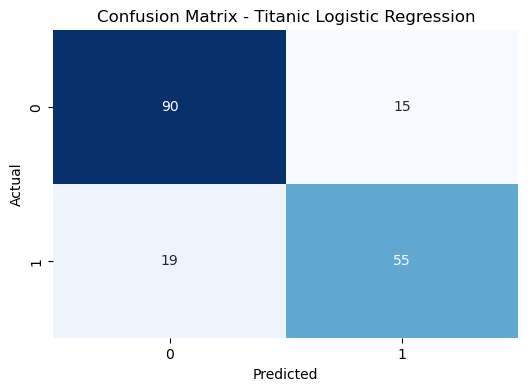

In [ ]:
# Step 1: Import necessary libraries
import os
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

train_path = 'train.csv'
test_path = 'test.csv'

if not os.path.exists(train_path):
    raise FileNotFoundError("train.csv not found. Please ensure it is placed in './titanic_data/' folder.")

train = pd.read_csv(train_path)
print("✅ Titanic dataset loaded successfully.")
print("Training data shape:", train.shape)

# Data Cleaning and Preprocessing

# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
train.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])

# Verify the preprocessing
print("\n✅ Data cleaning and encoding completed.")
print(train.head())

#Split Dataset into Features and Target

X = train.drop('Survived', axis=1)
y = train['Survived']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Train-test split completed.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Logistic Regression Model Training
# Measure model runtime and accuracy
start_time = time.time()

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate runtime
runtime_titanic = time.time() - start_time

# Model Evaluation
accuracy_titanic = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n✅ Logistic Regression Model Evaluation:")
print(f"Runtime: {runtime_titanic:.4f} sec")
print(f"Accuracy: {accuracy_titanic:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Titanic Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅ COVID-19 dataset fetched successfully from Johns Hopkins GitHub mirror.
Shape: (289, 1147)
Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20']


/var/folders/09/0n56q5852xd5l1npcfqkg_2r0000gn/T/ipykernel_2912/1401154962.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_melted["Date"] = pd.to_datetime(covid_melted["Date"], errors="coerce")


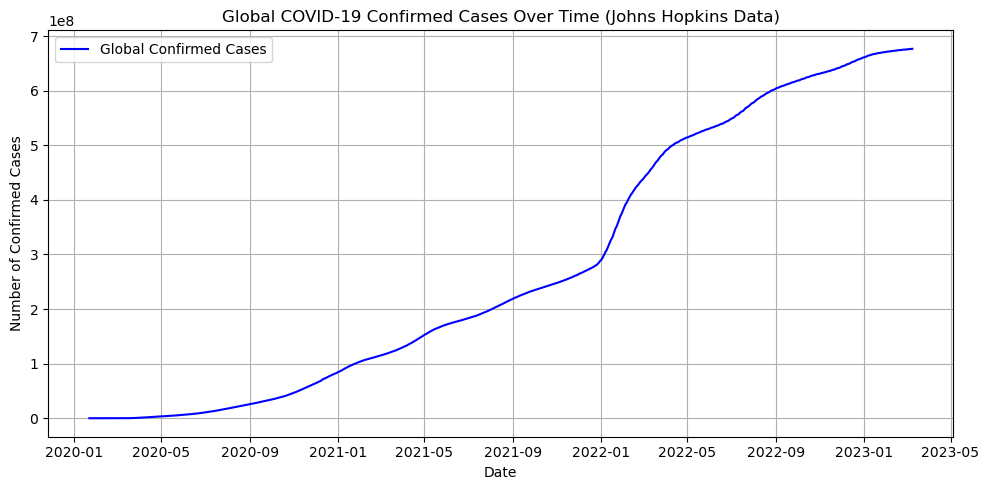

COVID-19 Plot Rendering Time: 0.0850 sec


In [ ]:

# COVID-19 Dataset Visualization
import pandas as pd
import matplotlib.pyplot as plt
import time
import io
import requests

#WHO dataset mirror from Johns Hopkins University
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
if response.status_code != 200:
    raise Exception(f"Failed to fetch data: {response.status_code}")

covid_data = pd.read_csv(io.StringIO(response.text))
print("✅ COVID-19 dataset fetched successfully from Johns Hopkins GitHub mirror.")
print("Shape:", covid_data.shape)
print("Columns:", list(covid_data.columns)[:10])

# Prepare data for visualization
# Melt the data to get 'Date' and 'Cases'
covid_melted = covid_data.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)
covid_melted["Date"] = pd.to_datetime(covid_melted["Date"], errors="coerce")

# Aggregate global cases
global_cases = (
    covid_melted.groupby("Date")["Confirmed"]
    .sum()
    .reset_index()
    .sort_values("Date")
)

# Step 3: Plot and measure runtime
start_time = time.time()
plt.figure(figsize=(10, 5))
plt.plot(global_cases["Date"], global_cases["Confirmed"], label="Global Confirmed Cases", color="blue")
plt.title("Global COVID-19 Confirmed Cases Over Time (Johns Hopkins Data)")
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

runtime_covid_plot = time.time() - start_time
print(f"COVID-19 Plot Rendering Time: {runtime_covid_plot:.4f} sec")


5. Results Summary
All metrics (runtime, accuracy, and plot time) are summarized below.

In [15]:

# Store all results
results = pd.DataFrame({
    'Dataset': ['Iris', 'Titanic', 'COVID-19'],
    'Runtime (sec)': [runtime_iris, runtime_titanic, runtime_covid_plot],
    'Accuracy': [accuracy_iris, accuracy_titanic, None]
})

print(results)
results.to_csv('results_summary.csv', index=False)
print("\nResults saved to 'results_summary.csv' successfully.")


    Dataset  Runtime (sec)  Accuracy
0      Iris       0.025278  1.000000
1   Titanic       0.058549  0.810056
2  COVID-19       0.084991       NaN

Results saved to 'results_summary.csv' successfully.


## 6. Conclusion
The experiments demonstrate comparative performance across datasets. Python’s logistic regression performance can be compared with R implementations using the same metrics of runtime and accuracy. For visualization, plotting time serves as a direct measure of performance.